In [ ]:
import pandas as pd
df = pd.read_csv('/content/AirPassengers.csv')
print(df.head())  # Preview dataset

         date  value
0  1949-01-01    112
1  1949-02-01    118
2  1949-03-01    132
3  1949-04-01    129
4  1949-05-01    121



### Dataset Info ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    144 non-null    object
 1   value   144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
None

### Missing Values ###
date     0
value    0
dtype: int64


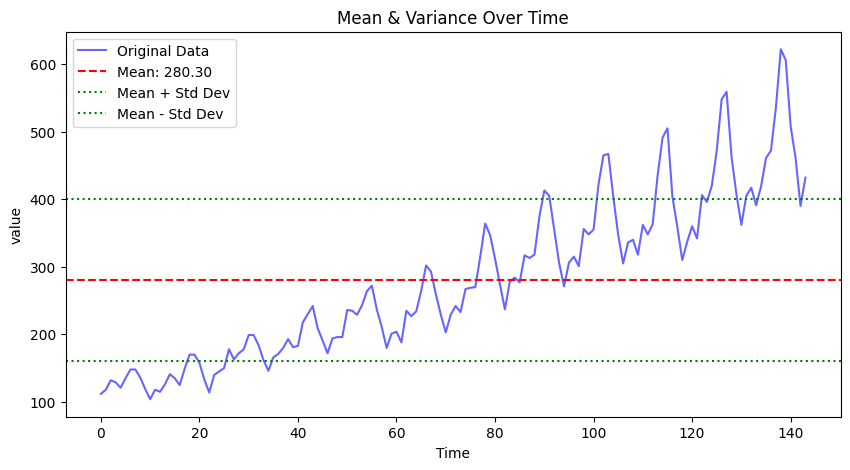


### ADF Test Results ###
ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Values: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
The time series is NOT stationary (Fail to reject H0).

### Checking Stationarity After Log Transformation ###

### ADF Test Results ###
ADF Statistic: -1.7170170891069683
p-value: 0.4223667747703874
Critical Values: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
The time series is NOT stationary (Fail to reject H0).


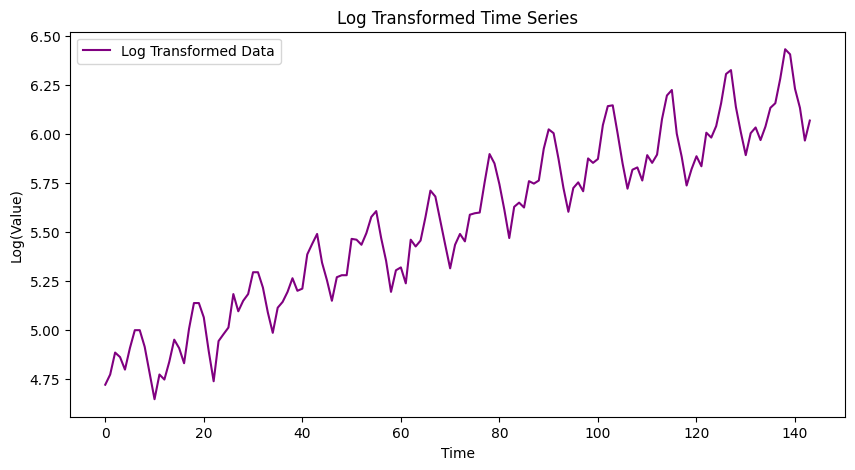

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Display dataset info
print("\n### Dataset Info ###")
print(df.info())

# Check for missing values
print("\n### Missing Values ###")
print(df.isnull().sum())

# Convert time column to DateTime format (if applicable)
if 'Month' in df.columns:
    df['Month'] = pd.to_datetime(df['Month'])
    df.set_index('Month', inplace=True)  # Set Month as index

# Extract numeric column
column_name = df.columns[0] if df.shape[1] == 1 else df.columns[1]  # Assuming 2nd column is numeric
series = df[column_name]

# Calculate Mean and Variance
mean_value = series.mean()
variance_value = series.var()

# Plot Mean & Variance
plt.figure(figsize=(10, 5))
plt.plot(df.index, series, label="Original Data", color='blue', alpha=0.6)
plt.axhline(mean_value, color='red', linestyle='dashed', label=f"Mean: {mean_value:.2f}")
plt.axhline(mean_value + np.sqrt(variance_value), color='green', linestyle='dotted', label=f"Mean + Std Dev")
plt.axhline(mean_value - np.sqrt(variance_value), color='green', linestyle='dotted', label=f"Mean - Std Dev")
plt.xlabel("Time")
plt.ylabel(column_name)
plt.title("Mean & Variance Over Time")
plt.legend()
plt.show()

# Perform Augmented Dickey-Fuller Test (ADF)
def check_stationarity(series):
    adf_test = adfuller(series)
    print("\n### ADF Test Results ###")
    print("ADF Statistic:", adf_test[0])
    print("p-value:", adf_test[1])
    print("Critical Values:", adf_test[4])

    if adf_test[1] < 0.05:
        print("The time series is stationary (Reject H0).")
        return True
    else:
        print("The time series is NOT stationary (Fail to reject H0).")
        return False

# Check stationarity
is_stationary = check_stationarity(series)

# Apply Log Transformation if Data is Non-Stationary
if not is_stationary:
    df['Log_Value'] = np.log(series)
    print("\n### Checking Stationarity After Log Transformation ###")
    is_stationary = check_stationarity(df['Log_Value'])

    # Plot Transformed Data
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df['Log_Value'], label="Log Transformed Data", color='purple')
    plt.xlabel("Time")
    plt.ylabel("Log(Value)")
    plt.title("Log Transformed Time Series")
    plt.legend()
    plt.show()